# Read me
Below is unix command that runs an optimization code "KeyRateOptimization.py", that optimize the parameters of chosen SCW-QKD protocol with the non-gradient algorithm. 

The code has several options such as 
1. Choice of protocol (-scheme), (0 for the Interface, 1 for the Conventional Scheme) 
2. Range of communication in km given in starting (-dStart) and finishing (-dStop) distances.
3. The folderName is name of a folder, where the optimization results are saved as text files.

All other options and model parameters can be checked in the source code "KeyRateOptimization.py". 

In [ ]:
! python KeyRateOptimization.py -scheme 0 -dStart 20 -dStop 176 -folderName "Interface-Scheme"

# Visualizing the results
## Visualizing the key rate
Once the optimization is done the code below will plot a key rate vs communication distance.
There two key variables to select:
1. folderName is a name of the folder where the optimization resuls are stored.
2. date1 is date used for selecting particular optimzation.

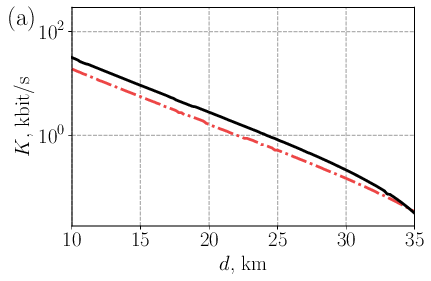

In [12]:
import matplotlib.pyplot as plt
import scipy.special as sf
import MeasurementScheme as MS
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
blue_1   = (91/255, 155/255, 213/255);
red_1    = (237/255, 70/255, 70/255);
green_1  = (0/255, 176/255, 80/255);
black_1  = (0, 0, 0);
unknown_1   = (150/255, 15/255, 213/255);
unknown_2    = (150/255, 150/255, 150/255);
blue_2   = (91/255, 100/255, 255/255);
red_2    = (150/255, 70/255, 70/255);
green_2  = (0/255, 250/255, 80/255);






folderName = ['Original-Scheme','Interface-Scheme']

krOrg=np.genfromtxt(f'{folderName[0]}/key-rate-array.out', delimiter=',')
pOrg=np.genfromtxt(f'{folderName[0]}/parameters.out', delimiter=',')
distOrg=np.genfromtxt(f'{folderName[0]}/distance-array.out', delimiter=',') 

krInt=np.genfromtxt(f'{folderName[1]}/key-rate-array.out', delimiter=',')
pInt=np.genfromtxt(f'{folderName[1]}/parameters.out', delimiter=',')
distInt=np.genfromtxt(f'{folderName[1]}/distance-array.out', delimiter=',') 


fig, ax = plt.subplots()  # Create a figure and an axes. figsize=(16, 9)

# hbar=1.05*10**-34
# w0=12.56*10**14

# def n0(Pin,T):
#         return Pin*T/(hbar*w0)



plt.grid(linestyle='--', linewidth=2)
ax.set_yscale('log')
# km to dB correspondence 
lc =0.2
plt.plot(lc*distOrg,krOrg, color=red_1, linewidth=2.5,label='', linestyle='-.')
plt.plot(lc*distInt,krInt, color=black_1, linewidth=2.5,label='', linestyle='-')
ax.set_xlim(left=10,right=35)
#ax.set_ylim(bottom=0.01)
plt.grid(linestyle='--', linewidth=1)
plt.xlabel('$d$, km')
plt.ylabel('$K$, kbit/s')
plt.gcf().text(0.01, 0.9, '(a)',fontsize=32)
#plt.yticks(ticks=[0.1,1,10,100])
#plt.xticks(ticks=[10,20,30,40,50,60,70])
plt.tight_layout()



# Latex style for pictures
The code below redefines the matplotlib drawing with latex style

In [ ]:
matplotlib.use("pgf")
pgf_with_pdflatex = {
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
        r"\usepackage{amssymb}",
        r"\DeclareUnicodeCharacter{2212}{-}"
         ],
    'ytick.labelsize':22,
    'xtick.labelsize':22,
    'axes.labelsize' : 22,
    'axes.titlesize': 22,
    "font.family": "serif",
    "font.serif": [],                    # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"],  
}
matplotlib.rcParams.update(pgf_with_pdflatex)

# Visualizing the parameters
The obtained modulation depth and intensity are visulaized below.
Polynomial fit is used to smooth the optimal data. The former procedure is needed since the non-gradient optimzation tends to accidentally produce spikes, that are usually averaged if several optimization are perfromed. However here I assumed the continious charactered of the function and hence removed the spikes by high order polynomiial fit.

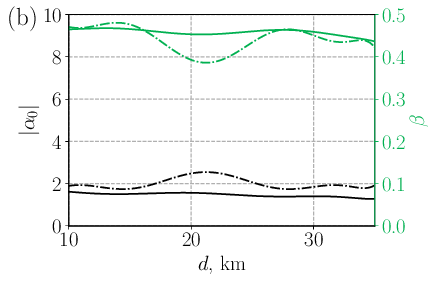

In [10]:
from scipy.optimize import curve_fit
def func(x, a, b, c,d,e,f,g,j,k):
    return k*x**8+j*x**7+g*x**6+ f*x**5+e*x**4 + d*x**3 + c*x**2 + b*x + a


alphaOpt=pOrg[:,0]
betaOpt=pOrg[:,1]

alphaInt=pInt[:,0]
betaInt=pInt[:,1]


poptB, pcovB = curve_fit(func,lc*distOrg,betaOpt)
poptAlpha0, pcovAlpha0 = curve_fit(func,lc*distOrg,alphaOpt)

poptA, pcovA = curve_fit(func,lc*distInt,betaInt)
poptAlpha1, pcovAlpha1 = curve_fit(func,lc*distInt,alphaInt)


fig, ax = plt.subplots()




ax.plot(lc*distOrg, func(lc*distOrg, *poptAlpha0), color=black_1,linestyle='-.')
ax.plot(lc*distInt, func(lc*distInt, *poptAlpha1), color=black_1,linestyle='-')

plt.grid(linestyle='--', linewidth=1)
plt.xlabel('$d$, km')
plt.ylabel('$|\\alpha_0|$')
plt.gcf().text(0.00, 0.9, '(b)',fontsize=32)
ax.set_yticks(ticks=[0,2,4,6,8,10])



ax2 = ax.twinx()
ax2.plot(lc*distOrg, func(0.2*distOrg, *poptB), color=green_1,linestyle='-.')
ax2.plot(lc*distInt, func(0.2*distInt, *poptA), color=green_1,linestyle='-')
ax2.spines['right'].set_color(green_1)
ax2.tick_params(axis='x', colors=green_1)
ax2.tick_params(axis='y', colors=green_1)
ax2.set_yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5])
ax2.yaxis.label.set_color(green_1)
ax2.set_ylabel('$\\beta$')
ax.set_xlim(left=10,right=35)
plt.tight_layout()